<a href="https://colab.research.google.com/github/TrunnMosby/Predictive-Maintenance-of-Wind-Turbine/blob/main/Generator_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# importing dataset
data=pd.read_csv('/content/gen2.csv')

In [ ]:
data

,Unnamed: 0,Gen_bearing_temperature,Generator_speed,Gen_Phase3_Temp_Avg,Gen_Bear2_Temp,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Nacelle_Temperature,Power
0,0,43.0,647.1,57,39,56,57,28,-1741
1,1,40.0,265.5,54,35,54,54,28,-1390
2,2,43.0,293.1,53,38,53,54,28,-1619
3,3,39.0,1248.8,63,36,63,63,27,4862
4,4,39.0,291.4,51,34,51,51,28,-1365
...,...,...,...,...,...,...,...,...,...
209231,209231,55.0,1619.8,86,65,89,87,33,192110
209232,209232,42.0,0.0,46,36,45,46,31,-1842
209233,209233,64.0,1565.7,73,53,72,73,30,143336
209234,209234,39.0,0.0,41,34,41,41,30,-1828


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Mahanabolis distance filteration
MD=pd.read_csv('/content/MD_newdata.csv')

In [ ]:
# Merging both datasets
df= pd.merge(data,MD)

In [ ]:
# Removing the null values
df=df.dropna()

In [ ]:
df=df[df['Power']!=0]

In [ ]:
# Filtering outliers
max_threshold=df['MD'].quantile(0.85)
min_threshold=df['MD'].quantile(0.15)

In [ ]:
ftest=df[(df['MD']<max_threshold) & (df['MD']>min_threshold)]

In [ ]:
ftest

,Unnamed: 0,Gen_bearing_temperature,Generator_speed,Gen_Phase3_Temp_Avg,Gen_Bear2_Temp,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Nacelle_Temperature,Power,MD
0,1,40.0,265.5,54,35,54,54,28,-1390,2.799417
1,2,43.0,293.1,53,38,53,54,28,-1619,3.030315
2,3,39.0,1248.8,63,36,63,63,27,4862,3.707309
3,4,39.0,291.4,51,34,51,51,28,-1365,2.459624
4,5,41.0,957.8,58,38,57,58,26,4702,3.522508
...,...,...,...,...,...,...,...,...,...,...
209228,209229,62.0,1637.7,93,71,96,95,34,231292,3.213454
209229,209230,38.0,0.0,41,37,41,41,32,-1734,3.425543
209230,209231,55.0,1619.8,86,65,89,87,33,192110,4.709864
209232,209233,64.0,1565.7,73,53,72,73,30,143336,6.503370


In [ ]:
# Selecting input and output for training the model
features=ftest[['Generator_speed', 'Gen_Phase3_Temp_Avg',	'Gen_Bear2_Temp',	'Gen_Phase1_Temp_Avg',	'Gen_Phase2_Temp_Avg',	'Nacelle_Temperature',	'Power'	]]
labels=ftest['Gen_bearing_temperature']

In [ ]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(features)

In [ ]:
# Spliting the data into 70% train and 30% test
xtrain=x_sc[:102505]
xtest=x_sc[102505:]
ytrain=labels[:102505]
ytest=labels[102505:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# training the random forest model
gmodel=RandomForestRegressor()
gmodel.fit(xtrain,ytrain)
pred=gmodel.predict(xtest)
train_pred= gmodel.predict(xtrain)

In [ ]:
# RMSE
print(np.sqrt(mse(pred,ytest)))

3.2914015849405027


In [ ]:
#MAE
print((mae(pred,ytest)))

2.08558590774646


<Figure size 1440x1440 with 0 Axes>

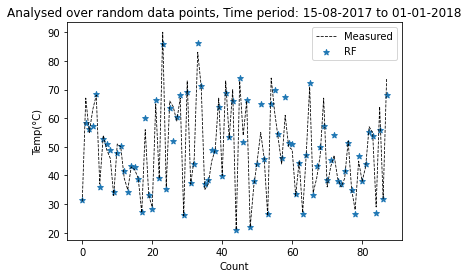

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Testing the model over random data points
plt.plot([i for i in range(len(pred[::500]))],ytest[::500],linestyle='dashed',color='black',linewidth=0.8)

plt.scatter([i for i in range(len(pred[::500]))],pred[::500],marker='*')


plt.legend(['Measured','RF'])
plt.ylabel('Temp(°C)')
plt.xlabel('Count')
plt.title('Analysed over random data points, '+'Time period: 15-08-2017 to 01-01-2018')
plt.figure(figsize=(20, 20))

In [ ]:
# Creating a dataframe to note the deviations
deviation=[]

for i,j in zip(pred,ytest):
  deviation.append(j-i)

In [ ]:
f=pd.DataFrame({'Deviations':deviation})

In [ ]:
f['Deviations_shift']=f['Deviations'].shift(1)

In [ ]:
f['difference']=f['Deviations'].diff()

In [ ]:
count= [i for i in range(len(ytest))]

In [ ]:
f=f.dropna()

In [ ]:
values=[]
for i in f['difference']:
  if(i>0):
    values.append(i)
  else:
    values.append(-1*i)

In [ ]:
ucl=3* np.std(f['Deviations'])
lcl=-1*ucl

In [ ]:
UCL=[]
for i in range(23000):
  UCL.append(ucl)

In [ ]:
LCL=[]
for i in range(23000):
  LCL.append(lcl)

In [ ]:
r=[i for i in f['Deviations'].iloc[5000:28000]]

Text(0.5, 1.0, 'Predictions using RF for Generator failure (On x-axis:1440 units= 10 days)  Time period: 15-08-2017 to 01-01-2018')

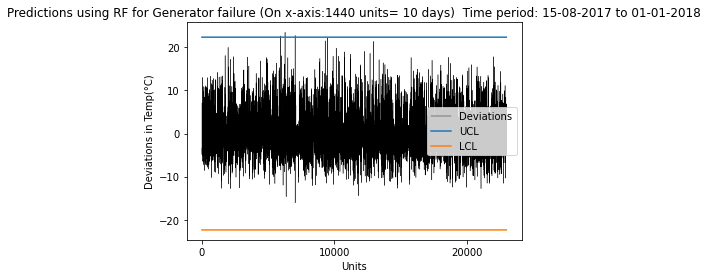

In [ ]:
plt.plot(r,color="black",linewidth=0.4)
plt.plot(UCL)
plt.plot(LCL)
plt.xticks(np.arange(0, len(r)+1, 10000))
plt.ylabel('Deviations in Temp(°C)')
plt.xlabel('Units')
plt.legend(['Deviations','UCL','LCL'])
plt.title('Predictions using RF for Generator failure '+ '(On x-axis:1440 units= 10 days)  '+'Time period: 15-08-2017 to 01-01-2018' )
